In [1]:
import numpy as np
import keras
import matplotlib.pyplot as plt
%matplotlib inline

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


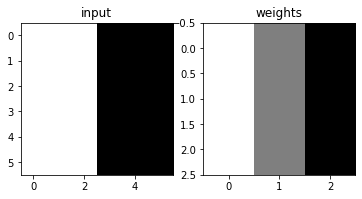

In [2]:
from skimage.transform import resize
from skimage.color import gray2rgb

input = np.zeros((6,6,1))
for i in range(input.shape[0]):
  for j in range(3):
    input[i,j,0]=10
#print(input)
weights = np.zeros((3,3,1))
for i in range(weights.shape[0]):
  weights[i,0,0] = 1
  weights[i,1,0] = 0.5

weights = weights.reshape((3,3,1,1))
new_input = gray2rgb(input).reshape(6,6,3)
new_weights = gray2rgb(weights).reshape(3,3,3)

weights = np.zeros((3,3,1))
for i in range(weights.shape[0]):
  weights[i,0,0] = 1
  weights[i,2,0] = -1  
weights = weights.reshape((3,3,1,1))

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('input')
axarr[0].imshow(new_input)
axarr[1].set_title('weights')
axarr[1].imshow(new_weights)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


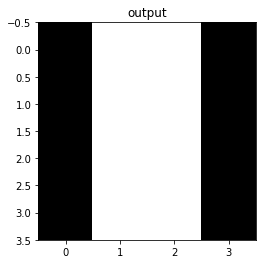

In [3]:
from keras.models import Sequential
from keras.layers import MaxPooling2D, Dropout, Dense, Flatten
from keras.layers import Convolution2D as Conv2D
from keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(1, (3, 3), activation='relu', input_shape=(6, 6,1)))
model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),metrics=['accuracy'])
model.set_weights(weights=(weights,np.array([0.])))
output = model.predict(input.reshape((1,6,6,1)))
new_output = gray2rgb(output.reshape(4,4,1)).reshape(4,4,3)

fig, axarr = plt.subplots(1, 1)
axarr.set_title('output')
axarr.imshow(new_output)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


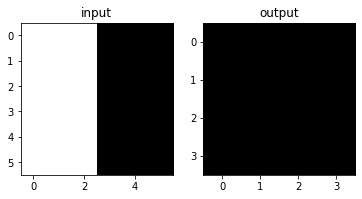

In [4]:
model = Sequential()
model.add(Conv2D(1, (3, 3), activation='relu', input_shape=(6, 6,1)))
model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),metrics=['accuracy'])
#print(model.get_weights())

weights = np.zeros((3,3,1))
for i in range(weights.shape[1]):
  weights[0,i,0] = 1
  weights[2,i,0] = -1
weights = weights.reshape((3,3,1,1))

model.set_weights(weights=(weights,np.array([0.])))
output = model.predict(input.reshape((1,6,6,1)))
new_output = gray2rgb(output.reshape(4,4,1)).reshape(4,4,3)
new_input = gray2rgb(input).reshape(6,6,3)

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('input')
axarr[0].imshow(new_input)
axarr[1].set_title('output')
axarr[1].imshow(new_output)